In [1]:
import numpy as np 
import xarray as xr
from matplotlib import pyplot as plt
import os

%matplotlib inline

In [2]:
from ecco_read_utilities import *

In [3]:
ds = open_ecco_tendencies('Stend', 'Sad', 'Sdi', 'Sforc')

### Volume of the grid cells

In [4]:
ds['vol'] = ds.area*ds.thic*ds.land

### Spatial distributions

In [5]:
tstart = '2008-06-01'
tend = '2008-10-31'

upper = 0
lower = 20

#### Volumne

In [6]:
vol = ds.vol.sel(depth=slice(upper,lower))

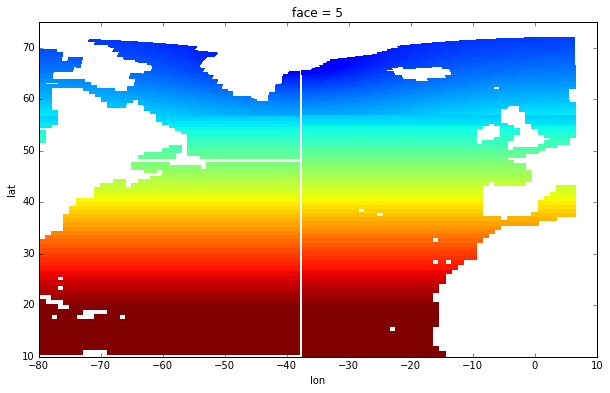

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

vol.sum('depth',skipna=False)[41].plot(x='lon', y='lat', ax=ax, add_colorbar=False,vmin=0,vmax=2.2e11,cmap='jet')
vol.sum('depth',skipna=False)[5].plot(x='lon', y='lat', ax=ax, add_colorbar=False,vmin=0,vmax=2.2e11,cmap='jet')
vol.sum('depth',skipna=False)[43].plot(x='lon', y='lat', ax=ax, add_colorbar=False,vmin=0,vmax=2.2e11,cmap='jet')
vol.sum('depth',skipna=False)[4].plot(x='lon', y='lat', ax=ax, add_colorbar=False,vmin=0,vmax=2.2e11,cmap='jet')
ax.set_xlim((-80,10))
ax.set_ylim((10,75))

plt.show()

#### Tendencies

In [8]:
#Stend = ds.Stend.sel(time=slice(tstart,tend),depth=slice(upper,lower)).mean('depth').mean('time')
Stend = (ds.Stend.sel(time=slice(tstart,tend),depth=slice(upper,lower)).mean('time')*vol).sum('depth',skipna=False)\
            /vol.sum('depth',skipna=False)

#Sad = ds.Sad.sel(time=slice(tstart,tend),depth=slice(upper,lower)).mean('depth').mean('time')
Sad = (ds.Sad.sel(time=slice(tstart,tend),depth=slice(upper,lower)).mean('time')*vol).sum('depth',skipna=False)\
            /vol.sum('depth',skipna=False)

#Sdi = ds.Sdi.sel(time=slice(tstart,tend),depth=slice(upper,lower)).mean('depth').mean('time')
Sdi = (ds.Sdi.sel(time=slice(tstart,tend),depth=slice(upper,lower)).mean('time')*vol).sum('depth',skipna=False)\
            /vol.sum('depth',skipna=False)

#Sforc = ds.Sforc.sel(time=slice(tstart,tend),depth=slice(upper,lower)).mean('depth').mean('time')
Sforc = (ds.Sforc.sel(time=slice(tstart,tend),depth=slice(upper,lower)).mean('time')*vol).sum('depth',skipna=False)\
            /vol.sum('depth',skipna=False)

/usr/local/anaconda/lib/python2.7/site-packages/dask/array/reductions.py:183: RuntimeWarning: invalid value encountered in divide
  pair['n'].sum(dtype=dtype, **kwargs), dtype=dtype)


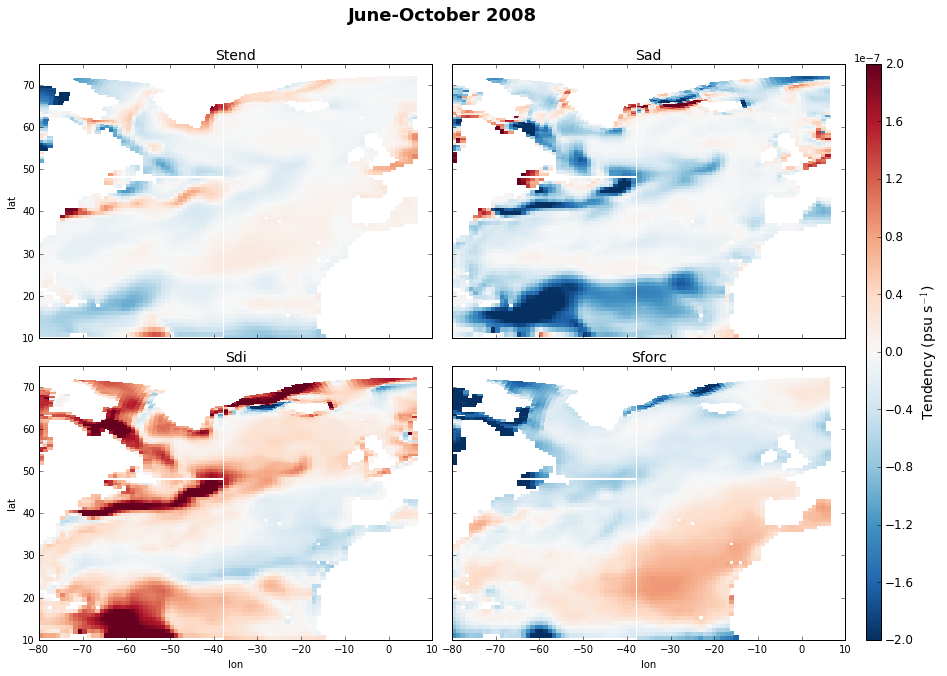

In [9]:
low = -2e-7
high = 2e-7

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(14,10))
f.tight_layout()
f.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.1, wspace=0.05)
f.suptitle('June-October 2008', fontsize=18, fontweight='bold')

p = Stend[41].plot(x='lon', y='lat', ax=ax1, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
Stend[5].plot(x='lon', y='lat', ax=ax1, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
Stend[43].plot(x='lon', y='lat', ax=ax1, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
Stend[4].plot(x='lon', y='lat', ax=ax1, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
ax1.set_xlim((-80,10))
ax1.set_ylim((10,75))
ax1.set_xlabel('')
ax1.set_title('Stend',fontsize=14)

Sad[41].plot(x='lon', y='lat', ax=ax2, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
Sad[5].plot(x='lon', y='lat', ax=ax2, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
Sad[43].plot(x='lon', y='lat', ax=ax2, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
Sad[4].plot(x='lon', y='lat', ax=ax2, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
ax2.set_xlim((-80,10))
ax2.set_ylim((10,75))
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Sad',fontsize=14)

Sdi[41].plot(x='lon', y='lat', ax=ax3, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
Sdi[5].plot(x='lon', y='lat', ax=ax3, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
Sdi[43].plot(x='lon', y='lat', ax=ax3, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
Sdi[4].plot(x='lon', y='lat', ax=ax3, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
ax3.set_xlim((-80,10))
ax3.set_ylim((10,75))
ax3.set_title('Sdi',fontsize=14)

Sforc[41].plot(x='lon', y='lat', ax=ax4, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
Sforc[5].plot(x='lon', y='lat', ax=ax4, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
Sforc[43].plot(x='lon', y='lat', ax=ax4, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
Sforc[4].plot(x='lon', y='lat', ax=ax4, add_colorbar=False,vmin=low,vmax=high,cmap='RdBu_r')
ax4.set_xlim((-80,10))
ax4.set_ylim((10,75))
ax4.set_ylabel('')
ax4.set_title('Sforc',fontsize=14)

cbar_ax = f.add_axes([0.92, 0.1, 0.015, 0.8])
cb = f.colorbar(p, cax=cbar_ax, ax=[ax1, ax2, ax3, ax4])
cb.ax.tick_params(labelsize=12)
cb.set_label(r'Tendency (psu s$^{-1}$)', fontsize=14)

plt.show()

#### Sum of tendencies

In [10]:
sum_of_tendencies = ds.Sad+ds.Sdi+ds.Sforc

In [11]:
#Ssum= sum_of_tendencies.sel(time=slice(tstart,tend),depth=slice(upper,lower)).mean('depth').mean('time')
Ssum = (sum_of_tendencies.sel(time=slice(tstart,tend),
                              depth=slice(upper,lower)).mean('time')*vol).sum('depth',skipna=False)\
            /vol.sum('depth',skipna=False)

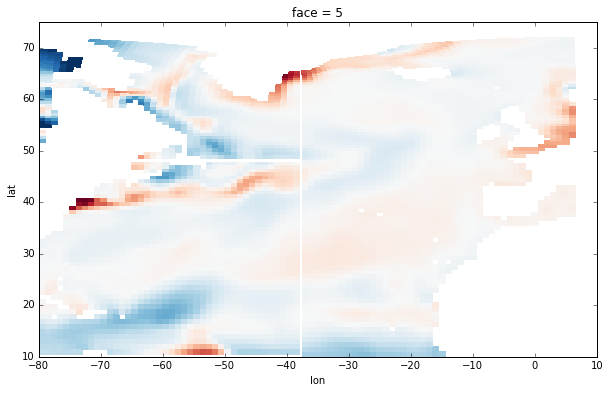

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

Ssum[41].plot(x='lon', y='lat', ax=ax, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
Ssum[5].plot(x='lon', y='lat', ax=ax, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
Ssum[43].plot(x='lon', y='lat', ax=ax, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
Ssum[4].plot(x='lon', y='lat', ax=ax, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
ax.set_xlim((-80,10))
ax.set_ylim((10,75))

plt.show()

### Vertical Profiles

In [52]:
tstart = '2008-06-01'
tend = '2008-10-31'

face_nr = 42

In [53]:
# Lat-lon box in the Larbardor Sea
north = 64
south = 55
west = -62
east = -47

In [54]:
Stend = ds.Stend.sel(time=slice(tstart,tend),face=face_nr).mean('time')
Sad = ds.Sad.sel(time=slice(tstart,tend),face=face_nr).mean('time')
Sdi = ds.Sdi.sel(time=slice(tstart,tend),face=face_nr).mean('time')
Sforc = ds.Sforc.sel(time=slice(tstart,tend),face=face_nr).mean('time')
vol = ds.vol.sel(face=face_nr)

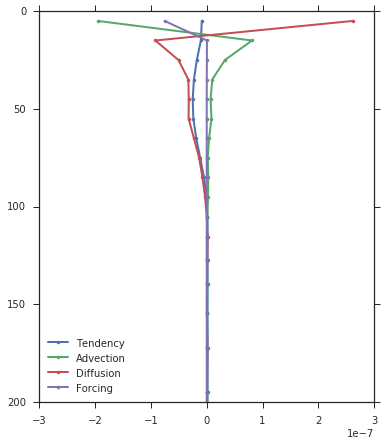

In [55]:
plt.figure(figsize=(6,7))

for var in (Stend, Sad, Sdi, Sforc):
    var_reg = var.where((var.lon>west)&(var.lon<east)&(var.lat>south)&(var.lat<north))
    vol_reg = vol.where((vol.lon>west)&(vol.lon<east)&(vol.lat>south)&(vol.lat<north))
    var_sum = (var_reg*vol_reg).sum(dim=['i3', 'i4'])
    var_mean = var_sum/vol_reg.sum(dim=['i3', 'i4'])
    #var_sum = var.where((var.lon>west)&(var.lon<east)&(var.lat>south)&(var.lat<north)).sum(dim=['i3', 'i4'])
    plt.plot(var_mean.values, var_mean.depth,lw=2,marker='.')

plt.ylim([0,200])
plt.xlim([-3e-7,3e-7])
plt.gca().invert_yaxis()
plt.legend(['Tendency','Advection', 'Diffusion','Forcing'],loc='lower left')

plt.show()

### Timeseries

In [17]:
tstart = '2004-01-01'
tend = '2011-12-31'

face_nr = 42

upper = 0
lower = 20

In [18]:
# Lat-lon box in the Larbardor Sea
north = 64
south = 55
west = -62
east = -47

In [19]:
Stend = ds.Stend.sel(time=slice(tstart,tend),face=face_nr,depth=slice(upper,lower))
Sad = ds.Sad.sel(time=slice(tstart,tend),face=face_nr,depth=slice(upper,lower))
Sdi = ds.Sdi.sel(time=slice(tstart,tend),face=face_nr,depth=slice(upper,lower))
Sforc = ds.Sforc.sel(time=slice(tstart,tend),face=face_nr,depth=slice(upper,lower))
vol = ds.vol.sel(face=face_nr,depth=slice(upper,lower))

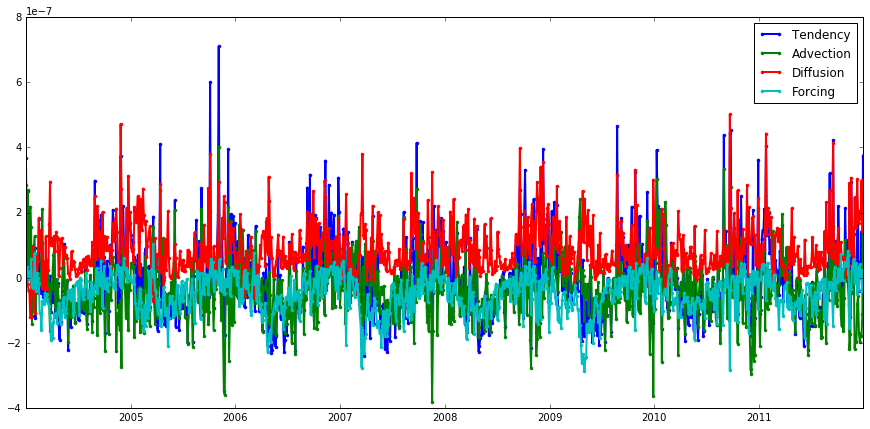

In [20]:
plt.figure(figsize=(15,7))

for var in (Stend, Sad, Sdi, Sforc):
    var_reg = var.where((var.lon>west)&(var.lon<east)&(var.lat>south)&(var.lat<north))
    vol_reg = vol.where((vol.lon>west)&(vol.lon<east)&(vol.lat>south)&(vol.lat<north))
    var_sum = (var_reg*vol_reg).sum(dim=['depth','i3', 'i4'])
    var_mean = var_sum/vol_reg.sum(dim=['depth','i3', 'i4'])
    plt.plot(var_mean.time,var_mean.values, lw=2,marker='.')

#plt.ylim([0,200])
#plt.xlim([-6e-5,8e-5])
plt.legend(['Tendency','Advection', 'Diffusion','Forcing'],loc='upper right')
plt.show()

#### Get spatial mean of regional tendencies

In [21]:
Stend_reg = Stend.where((Stend.lon>west)&(Stend.lon<east)&(Stend.lat>south)&(Stend.lat<north))
Sad_reg = Sad.where((Sad.lon>west)&(Sad.lon<east)&(Sad.lat>south)&(Sad.lat<north))
Sdi_reg = Sdi.where((Sdi.lon>west)&(Sdi.lon<east)&(Sdi.lat>south)&(Sdi.lat<north))
Sforc_reg = Sforc.where((Sforc.lon>west)&(Sforc.lon<east)&(Sforc.lat>south)&(Sforc.lat<north))
vol_reg = vol.where((vol.lon>west)&(vol.lon<east)&(vol.lat>south)&(vol.lat<north))

In [22]:
Stend_mean = (Stend_reg*vol_reg).sum(dim=['depth','i3', 'i4'])/vol_reg.sum(dim=['depth','i3', 'i4'])
Sad_mean = (Sad_reg*vol_reg).sum(dim=['depth','i3', 'i4'])/vol_reg.sum(dim=['depth','i3', 'i4'])
Sdi_mean = (Sdi_reg*vol_reg).sum(dim=['depth','i3', 'i4'])/vol_reg.sum(dim=['depth','i3', 'i4'])
Sforc_mean = (Sforc_reg*vol_reg).sum(dim=['depth','i3', 'i4'])/vol_reg.sum(dim=['depth','i3', 'i4'])

#### Salinity snapshots

In [24]:
ds_sna = open_ecco_snapshots('SALT')

In [25]:
S = ds_sna.SALT.sel(time=slice(tstart,tend),face=face_nr,depth=slice(upper,lower))

In [26]:
S_reg = S.where((S.lon>west)&(S.lon<east)&(S.lat>south)&(S.lat<north))

In [27]:
S_mean = (S_reg*vol_reg).sum(dim=['depth','i3', 'i4'])/vol_reg.sum(dim=['depth','i3', 'i4'])

In [28]:
S_anom = S_mean.groupby('time.month') - S_mean.groupby('time.month').mean('time')

#### Monthly salinity fields

In [29]:
ds_mon = open_ecco_variables('SALT')
ds_mon['vol'] = ds_mon.RAC*ds_mon.DRF*ds_mon.hFacC

In [30]:
ds_mon_face = ds_mon.sel(face=10)

In [31]:
ds_mon_reg = ds_mon_face.sel(time=slice(tstart,tend),i2=slice(1,2)).where((ds_mon_face.XC>west)&\
                                                                          (ds_mon_face.XC<east)&\
                                                                          (ds_mon_face.YC>south)&\
                                                                          (ds_mon_face.YC<north))

In [32]:
S_patch = ds_mon_reg.SALT
vol_patch = ((S_patch/S_patch)*ds_mon_reg.vol).sum(dim=['i2','i3', 'i4'])

In [33]:
S_mon_mean = (S_patch*ds_mon_reg.vol/vol_patch).sum(dim=['i2','i3', 'i4'])

In [34]:
S_mon_anom = S_mon_mean.groupby('time.month') - S_mon_mean.groupby('time.month').mean('time')

#### Timeseries plot

In [35]:
import matplotlib.dates as dates
import matplotlib.ticker as ticker

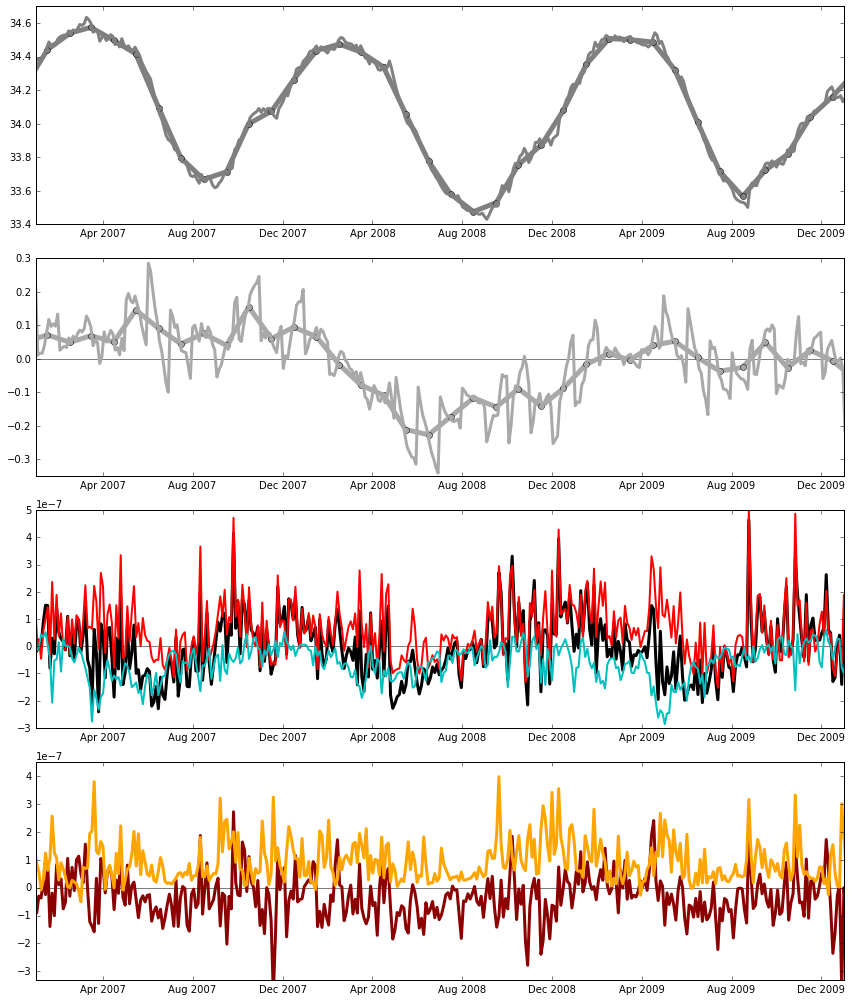

In [36]:
timeStart = '2006-12-31'
timeEnd = '2010-01-01'

fig = plt.figure(figsize=(12,14))

ax1 = fig.add_subplot(411)
ax1.plot(S_mon_mean.time, S_mon_mean, lw=5, color='grey', marker='o',linestyle='-')
ax1.plot(S_mean.time, S_mean, lw=3, color='grey', linestyle='-')
ax1.set_xlim([timeStart,timeEnd])
ax1.set_ylim([33.4,34.7])

ax2 = fig.add_subplot(412)
ax2.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
ax2.plot(S_mon_anom.time, S_mon_anom, lw=5, color='darkgray', marker='o',linestyle='-')
ax2.plot(S_anom.time, S_anom, lw=3, color='darkgray', linestyle='-')
ax2.set_xlim([timeStart,timeEnd])
ax2.set_ylim([-0.35,0.3])

ax3 = fig.add_subplot(413)
ax3.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
ax3.plot(Stend_mean.time, Stend_mean, lw=3, color='k', linestyle='-')
ax3.plot(Sdi_mean.time, Sad_mean+Sdi_mean, lw=2, color='r', linestyle='-')
ax3.plot(Sforc_mean.time, Sforc_mean, lw=2, color='c', linestyle='-')
ax3.set_xlim([timeStart,timeEnd])
ax3.set_ylim([-3e-7,5e-7])

ax4 = fig.add_subplot(414)
ax4.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
ax4.plot(Sad_mean.time, Sad_mean, lw=3, color='darkred', linestyle='-')
ax4.plot(Sdi_mean.time, Sdi_mean, lw=3, color='orange', linestyle='-')
ax4.set_xlim([timeStart,timeEnd])
ax4.set_ylim([-3.3e-7,4.5e-7])

fig.tight_layout()
plt.show()

### Dataframe

In [37]:
import pandas as pd

In [38]:
df = Stend_mean.to_dataframe(name='Stend').reset_index()
df.time = pd.DatetimeIndex(df.time)

In [39]:
df_Sad = Sad_mean.to_dataframe(name='Sad').reset_index()
df_Sad.time = pd.DatetimeIndex(df_Sad.time)
df['Sad'] = df_Sad.Sad

In [40]:
df_Sdi = Sdi_mean.to_dataframe(name='Sdi').reset_index()
df_Sdi.time = pd.DatetimeIndex(df_Sdi.time)
df['Sdi'] = df_Sdi.Sdi

In [41]:
df_Sforc = Sforc_mean.to_dataframe(name='Sforc').reset_index()
df_Sforc.time = pd.DatetimeIndex(df_Sforc.time)
df['Sforc'] = df_Sforc.Sforc

### Mean seasonal cycles

In [42]:
Stend_clim = df.set_index(['time'])[['Stend']].groupby(df.set_index(['time']).index.map(lambda x: x.month)).mean()
Sad_clim = df.set_index(['time'])[['Sad']].groupby(df.set_index(['time']).index.map(lambda x: x.month)).mean()
Sdi_clim = df.set_index(['time'])[['Sdi']].groupby(df.set_index(['time']).index.map(lambda x: x.month)).mean()
Sforc_clim = df.set_index(['time'])[['Sforc']].groupby(df.set_index(['time']).index.map(lambda x: x.month)).mean()

In [43]:
df['Saddi'] = df['Sad']+df['Sdi'] 

In [44]:
Saddi_clim = df.set_index(['time'])[['Saddi']].groupby(df.set_index(['time']).index.map(lambda x: x.month)).mean()

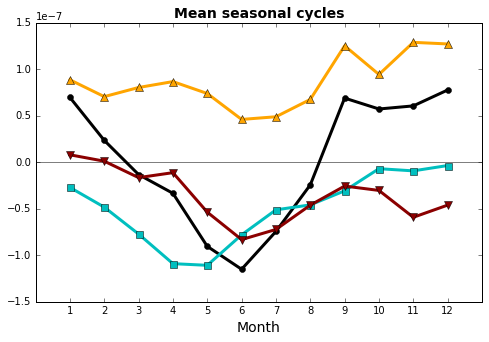

In [45]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.set_title('Mean seasonal cycles',fontsize=14,fontweight='bold')

ax1.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
ax1.plot(np.arange(1,13,1),Stend_clim,'.k-',linewidth=3,markersize=12,label='Stend')
ax1.plot(np.arange(1,13,1),Sforc_clim,'sc-',linewidth=3,markersize=7,label='Sforc')
ax1.plot(np.arange(1,13,1),Sad_clim,color='darkred',marker='v',linewidth=3,markersize=8,label='Sad')
ax1.plot(np.arange(1,13,1),Sdi_clim,color='orange',marker='^',linewidth=3,markersize=8,label='Sdi')
ax1.set_xlabel('Month',fontsize=14)
ax1.set_xlim([0, 13])
ax1.set_ylim([-1.5e-7, 1.5e-7])
ax1.set_xticks(np.linspace(1,12,12))

plt.show()

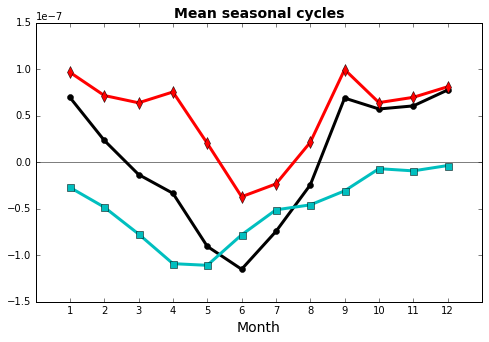

In [46]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.set_title('Mean seasonal cycles',fontsize=14,fontweight='bold')

ax1.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
ax1.plot(np.arange(1,13,1),Stend_clim,'.k-',linewidth=3,markersize=12,label='Stend')
ax1.plot(np.arange(1,13,1),Sforc_clim,'sc-',linewidth=3,markersize=7,label='Sforc')
ax1.plot(np.arange(1,13,1),Saddi_clim,color='r',marker='d',linewidth=3,markersize=8,label='Sad+Sdi')
ax1.set_xlabel('Month',fontsize=14)
ax1.set_xlim([0, 13])
ax1.set_ylim([-1.5e-7, 1.5e-7])
ax1.set_xticks(np.linspace(1,12,12))

plt.show()

### Correlation

In [48]:
import seaborn as sns

In [49]:
sns.set(style="ticks", color_codes=True)

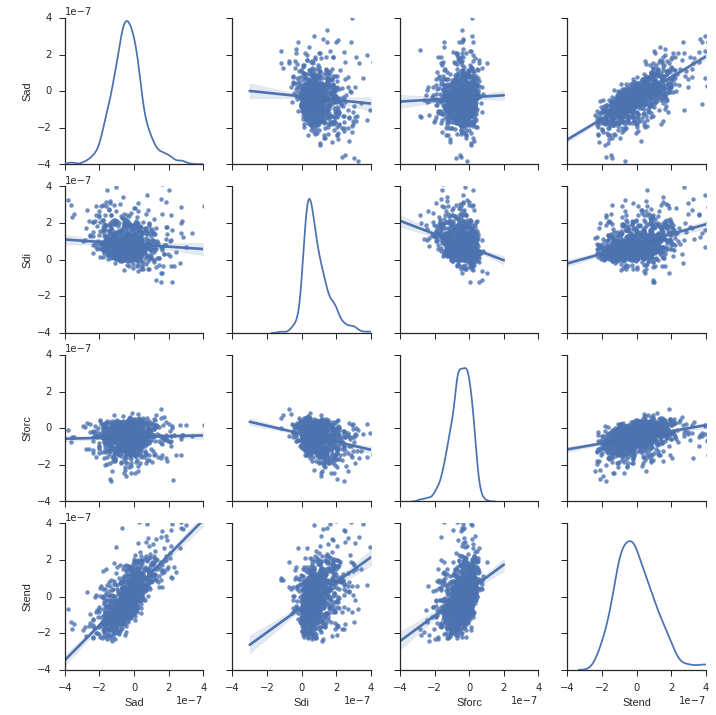

In [50]:
ticks = np.array(1e-7 * np.linspace(-4,4,5))
lm = sns.pairplot(df.dropna(),vars=('Sad','Sdi','Sforc','Stend'),kind='reg',diag_kind='kde')
lm.set(xticks=ticks,yticks=ticks,xlim=(-4e-7,4e-7),ylim=(-4e-7,4e-7))
plt.show()